In [100]:
%matplotlib inline
import math
import random
import subprocess 
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.stats.stats import pearsonr

from sklearn import tree
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation
from sklearn.cross_validation import cross_val_score
from sklearn import neighbors
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors.lof import LocalOutlierFactor

In [101]:
data = pd.read_csv("output.csv", delimiter=',', header=0) 
data.drop(["Sex_Val", "Age","Rings"], axis = 1, inplace = True)

In [102]:
data.head(10)

,Length,Diameter,Height,Whole,Shucked,Viscera,Shell
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330
5,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260
6,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165
7,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320
8,0.525,0.380,0.140,0.6065,0.1940,0.1475,0.210
9,0.430,0.350,0.110,0.4060,0.1675,0.0810,0.135


In [103]:
df=data.values

In [104]:
df[5]

array([ 0.545 ,  0.425 ,  0.125 ,  0.768 ,  0.294 ,  0.1495,  0.26  ])

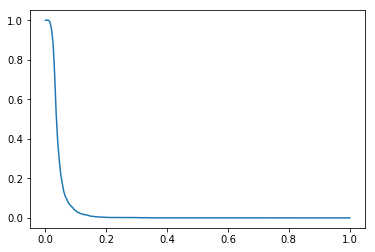

In [105]:
from sklearn.metrics import *
from sklearn.cluster import DBSCAN

xx = np.linspace(0.001, 1.00, 200)
yy = list()
for eps in xx:
    dbscan = DBSCAN(eps, min_samples=5, metric='euclidean')
    dbscan.fit(df)
    labels = dbscan.labels_
    yy.append(float(len([1 for i in labels if i == -1])) / len(df))
plt.plot(xx, yy)


In [106]:
my_eps = min( [ xx[i] for i in range(len(xx)) if yy[i]<0.01 ] )
print my_eps

0.146582914573


In [107]:
df[0]

array([ 0.455 ,  0.365 ,  0.095 ,  0.514 ,  0.2245,  0.101 ,  0.15  ])

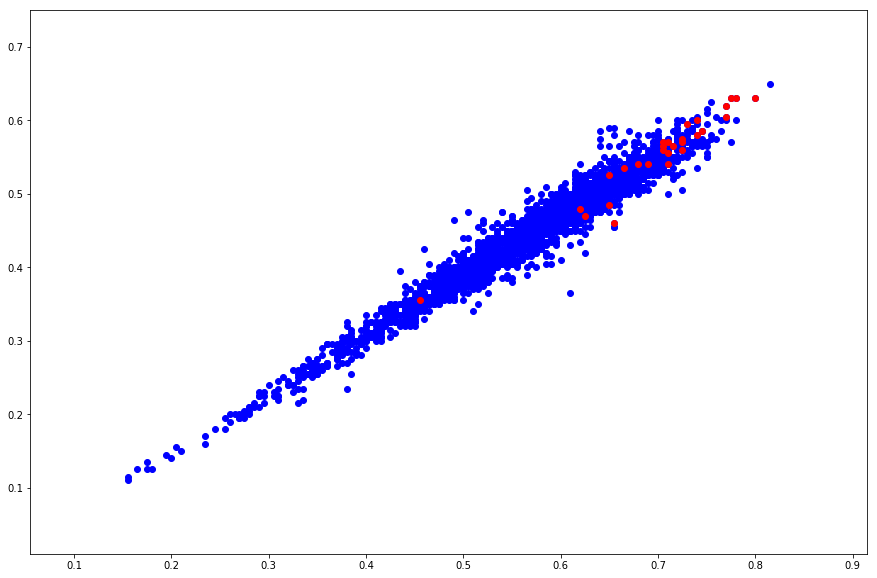

In [108]:
dbscan = DBSCAN(my_eps, min_samples=5, metric='euclidean')
dbscan.fit(df)
labels = dbscan.labels_
noise = np.array([ df[i] for i in range(len(df)) if labels[i]==-1])
plt.figure(figsize=(15,10))
plt.xlim(min(df[:,0]-0.1), max(df[:,0])+0.1)
plt.ylim(min(df[:,1]-0.1), max(df[:,1])+0.1)

plt.plot(df[:,0], df[:,1], 'bo')
plt.plot(noise[:,0], noise[:,1], 'ro')

In [109]:
len(noise)

28